# [!] Notebook Description

Sinubi's Journey - DL - Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BYJukiHfYlq5jrVvO__1JsD7aPDZqGuP?usp=sharing)

Oleh : Sinubi

September 2023 (230911)

# [A] Problem Definition and Scoping

Di sini kita akan memprediksi nilai siswa berdasarkan waktu belajar siswa, jenis kelamin, dan akses internet yang dimiliki siswa

# [B] Data Gathering and Preparation

In [ ]:
# Import Packages/Libraries yang diperlukan
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
tf.random.set_seed(123)

In [ ]:
# Download Dataset
gdown.download_folder("https://drive.google.com/drive/folders/1d0O3AuXl4z8VSj75v6WWuaxtUWXnmSYB?usp=sharing")

Retrieving folder list


Processing file 1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G Dataset SJ 01.xlsx
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G
To: /content/Sinubi's Journey/Dataset SJ 01.xlsx
100%|██████████| 12.2k/12.2k [00:00<00:00, 23.4MB/s]
Download completed


["/content/Sinubi's Journey/Dataset SJ 01.xlsx"]

In [ ]:
# Import Dataset
nama_file = "./Sinubi's Journey/Dataset SJ 01.xlsx"

data = pd.read_excel(nama_file, sheet_name='data')

# [C] Exploratory Data Analysis (EDA)

## [C1] Basic Information

In [ ]:
# Melihat Data pada Dataset yang dimuat (5 Data Pertama)
data.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,Pria,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,Pria,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,Wanita,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,Pria,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,Wanita,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
# Melihat Jumlah Kolom/Variabel serta Jumlah Baris Data atau Data Points
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nomor Induk     60 non-null     object 
 1   Nama            60 non-null     object 
 2   Jenis Kelamin   60 non-null     object 
 3   Mata Pelajaran  60 non-null     object 
 4   Akses Internet  60 non-null     object 
 5   Waktu Belajar   60 non-null     float64
 6   Nilai           60 non-null     int64  
 7   Lulus           60 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.9+ KB


## [C2] Data Type Correction

In [ ]:
# Kita ubah tipe data variabel fitur pada Dataset kita agar menjadi variabel numerik
# catatan : tidak perlu karena sudah numerik semua

daftar_nama_kolom_numerik = ['Waktu Belajar', 'Nilai']

for nama_kolom in daftar_nama_kolom_numerik:
  data[nama_kolom] = pd.to_numeric(data[nama_kolom])

In [ ]:
# Kita ubah tipe data viarabel taget pada Dataset kita agar menjadi variabel kategorik

daftar_nama_kolom_kategorik = ['Jenis Kelamin', 'Mata Pelajaran','Akses Internet','Lulus']

for nama_kolom in daftar_nama_kolom_kategorik:
  data[nama_kolom] = data[nama_kolom].astype('category')

In [ ]:
# Kita periksa kembali informasi mengenai Dataset kita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Nomor Induk     60 non-null     object  
 1   Nama            60 non-null     object  
 2   Jenis Kelamin   60 non-null     category
 3   Mata Pelajaran  60 non-null     category
 4   Akses Internet  60 non-null     category
 5   Waktu Belajar   60 non-null     float64 
 6   Nilai           60 non-null     int64   
 7   Lulus           60 non-null     category
dtypes: category(4), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


## [C3] Missing Values

In [ ]:
# Kita akan periksa apakah Dataset memiliki nilai kosong atau missing values
data.isnull().sum()

Nomor Induk       0
Nama              0
Jenis Kelamin     0
Mata Pelajaran    0
Akses Internet    0
Waktu Belajar     0
Nilai             0
Lulus             0
dtype: int64

## [C4] Univariate Analysis

### [C4.A] Descriptive Statistics

In [ ]:
# Statistik Deskriptif untuk setiap Variabel Numerik
data.describe()

,Waktu Belajar,Nilai
count,60.000000,60.000000
mean,5.998333,63.966667
std,2.154655,19.961800
min,1.900000,23.000000
25%,3.875000,45.750000
50%,6.750000,66.500000
75%,7.750000,81.250000
max,9.400000,92.000000


### [C4.B] Histogram

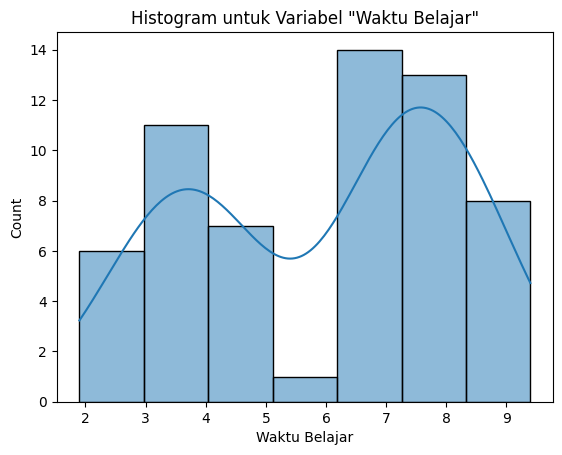

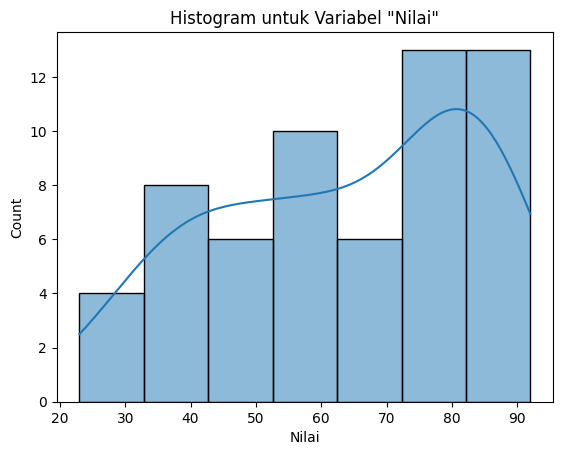

In [ ]:
# Visualisasi Histogram untuk setiap Variabel Numerik

for nama_kolom in daftar_nama_kolom_numerik:
  judul = 'Histogram untuk Variabel "' + nama_kolom + '"'

  plot = sns.histplot(data = data, x = nama_kolom, kde=True)
  plot_title = plt.title(judul)

  plt.show()
  print()

### [C4.C] Bar Chart

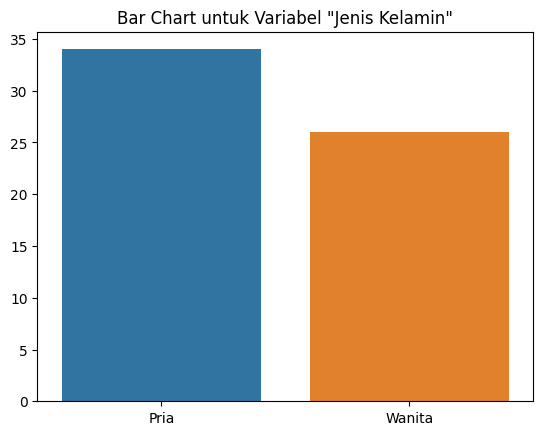

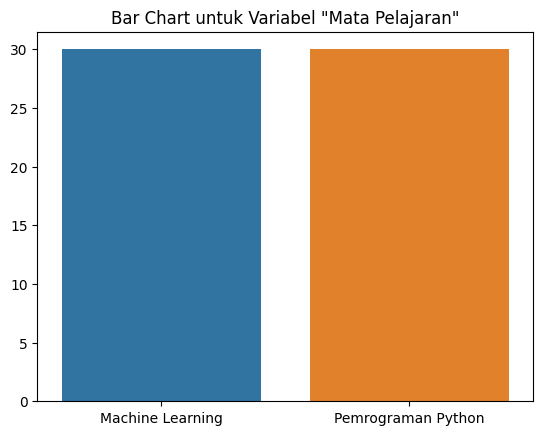

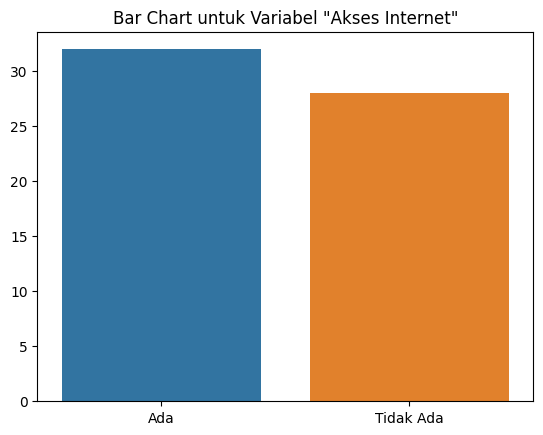

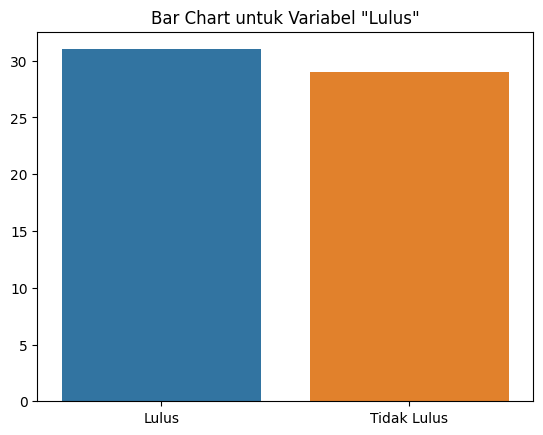

In [ ]:
# Visualisasi Distribusi Frequency dari Level untuk Variabel Kategorik pada Dataset
# menggunakan Bar Chart

palet_warna = sns.color_palette('bright')

for nama_kolom in daftar_nama_kolom_kategorik :
  judul = 'Bar Chart untuk Variabel "' + nama_kolom + '"'

  data_plot  = data[nama_kolom].value_counts().to_list()
  label_plot = data[nama_kolom].value_counts().index.to_list()

  plot       = sns.barplot(x = label_plot, y = data_plot)
  plot_title = plt.title(judul)

  plt.show()
  print()

## [C5] Bivariate Analysis

### [C.5.A] Scatterplot Matrix


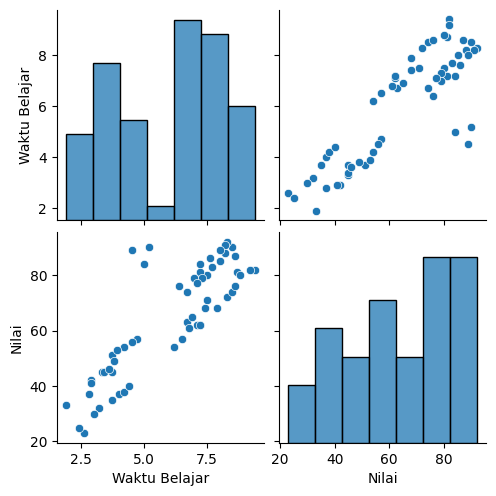

In [ ]:
# Scatter Plot antara Variabel Numerik

sns.pairplot(data);

## [C6] Statistical Test

### [C6.A] Pearson Correlation

In [ ]:
# Korelasi Pearson antara Waktu Belajar dengan Nilai
corr_pearson, _ = pearsonr(data['Waktu Belajar'], data['Nilai'])
print('Pearsons Correlation : %.3f' % corr_pearson)

Pearsons Correlation : 0.846


# [D] Data Wrangling and Variable Transformation

## [D1] Label Encoding for Categorical Variables

In [ ]:
data_proc1 = data.copy()

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,Pria,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,Pria,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,Wanita,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,Pria,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,Wanita,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
data_proc1['Jenis Kelamin'] = [0 if x == 'Pria' else 1 for x in data_proc1['Jenis Kelamin']]

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,0,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,0,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,1,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,0,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,1,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
data_proc1['Akses Internet'] = [1 if x == 'Ada' else 0 for x in data_proc1['Akses Internet']]

In [ ]:
data_proc1.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,0,Pemrograman Python,1,8.0,85,Lulus
1,DS23002,Budi,0,Pemrograman Python,1,7.5,80,Lulus
2,DS23003,Ayu,1,Pemrograman Python,1,8.5,90,Lulus
3,DS23004,Tono,0,Machine Learning,1,8.2,88,Lulus
4,DS23005,Putri,1,Machine Learning,1,7.7,83,Lulus


## [D2] Defining Features Variables and Target Variables

In [ ]:
# Mendefinisikan Variabel Fitur/Independent/Predictor/X

daftar_variabel_fitur = ['Jenis Kelamin', 'Akses Internet','Waktu Belajar']

X = data_proc1[daftar_variabel_fitur]
X[0:5]

,Jenis Kelamin,Akses Internet,Waktu Belajar
0,0,1,8.0
1,0,1,7.5
2,1,1,8.5
3,0,1,8.2
4,1,1,7.7


In [ ]:
# Mendefinisikan Variabel Target/Dependent/Y

Y = data_proc1['Nilai']
Y[0:5]

0    85
1    80
2    90
3    88
4    83
Name: Nilai, dtype: int64

## [D3] Partitioning Dataset into Train and Test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123)

In [ ]:
# Melihat Ukuran Data Variabel Fitur untuk Data Latih (Train)
X_train.shape

(48, 3)

In [ ]:
# Melihat Ukuran Data Variabel Target untuk Data Latih (Train)
Y_train.shape

(48,)

In [ ]:
# Melihat Ukuran Data Variabel Fitur untuk Data Uji (Test)
X_test.shape

(12, 3)

In [ ]:
# Melihat Ukuran Data Variabel Target untuk Data Uji (Test)
Y_test.shape

(12,)

# [E] Modelling

## [E1] Create Model

In [ ]:
# Membuat Model Pertama (Neural Network dengan Tensorflow)

model_1 = Sequential()
model_1.add(Dense(256, input_dim=3, activation='relu'))
model_1.add(Dense(1, activation='relu'))

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])


In [ ]:
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 256)               1024      
                                                                 
 dense_51 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Membuat Model Pertama (Neural Network dengan scikit-learn)

model_2 = MLPRegressor(hidden_layer_sizes=(256,),
                       activation='relu',
                       solver='sgd',
                       learning_rate='constant',
                       learning_rate_init=0.001,
                       random_state=123)

## [E2] Train Model

In [ ]:
# Melatih Model Pertama
model_1.fit(X_train, Y_train,
            validation_data=(X_test,Y_test),
            epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 192ms/step - loss: 65.4373 - mse: 4710.5469 - val_loss: 58.0833 - val_mse: 3575.5833
Epoch 2/100
2/2 [==============================] - 0s 43ms/step - loss: 65.4358 - mse: 4710.3862 - val_loss: 58.0631 - val_mse: 3572.9314
Epoch 3/100
2/2 [==============================] - 0s 57ms/step - loss: 65.3903 - mse: 4704.1465 - val_loss: 57.4759 - val_mse: 3496.4570
Epoch 4/100
2/2 [==============================] - 0s 51ms/step - loss: 64.5546 - mse: 4585.0381 - val_loss: 56.0947 - val_mse: 3324.6965
Epoch 5/100
2/2 [==============================] - 0s 48ms/step - loss: 63.0893 - mse: 4384.4048 - val_loss: 54.6485 - val_mse: 3149.7776
Epoch 6/100
2/2 [==============================] - 0s 39ms/step - loss: 61.5493 - mse: 4176.6606 - val_loss: 53.0679 - val_mse: 2964.2576
Epoch 7/100
2/2 [==============================] - 0s 56ms/step - loss: 59.8405 - mse: 3953.8821 - val_loss: 51.2388 - val_mse: 2756.7556
Epoch 8/100
2/2 [================

In [ ]:
# Melatih Model Kedua
model_2.fit(X_train,Y_train)

MLPRegressor(hidden_layer_sizes=(256,), random_state=123, solver='sgd')

# [F] Model Evaluation

## [F1] Prediction for Train Data

In [ ]:
# Prediksi untuk Model Pertama (Train Data)
pred_model_1_train = model_1.predict(X_train).reshape(-1).tolist()

df_pred_model_1_train = pd.DataFrame(X_train, columns = daftar_variabel_fitur)
df_pred_model_1_train['Nilai'] = Y_train
df_pred_model_1_train['Prediksi Nilai'] = pred_model_1_train
df_pred_model_1_train.head()

2/2 [==============================] - 0s 6ms/step


,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
54,0,0,8.8,80,80.902573
23,0,1,3.7,51,43.665230
11,0,0,7.2,62,66.608376
0,0,1,8.0,85,82.078941
5,0,1,7.6,86,78.505562


In [ ]:
# Prediksi untuk Model Kedua (Train Data)
pred_model_2_train = model_2.predict(X_train)

df_pred_model_2_train = pd.DataFrame(X_train, columns = daftar_variabel_fitur)
df_pred_model_2_train['Nilai'] = Y_train
df_pred_model_2_train['Prediksi Nilai'] = pred_model_2_train
df_pred_model_2_train.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
54,0,0,8.8,80,79.300654
23,0,1,3.7,51,50.951695
11,0,0,7.2,62,66.390473
0,0,1,8.0,85,85.651115
5,0,1,7.6,86,82.423893


## [F2] Prediction for Test Data

In [ ]:
# Prediksi untuk Model Pertama (Test Data)
pred_model_1_test = model_1.predict(X_test).reshape(-1).tolist()

df_pred_model_1_test = pd.DataFrame(X_test, columns = daftar_variabel_fitur)
df_pred_model_1_test['Nilai'] = Y_test
df_pred_model_1_test['Prediksi Nilai'] = pred_model_1_test
df_pred_model_1_test.head()

1/1 [==============================] - 0s 23ms/step


,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
24,0,1,2.8,37,35.609482
39,0,0,9.2,82,84.476158
15,1,0,8.6,76,79.611908
31,1,1,3.7,45,44.154911
43,0,1,3.8,49,44.558575


In [ ]:
# Prediksi untuk Model Kedua (Test Data)
pred_model_2_test = model_2.predict(X_test)

df_pred_model_2_test = pd.DataFrame(X_test, columns = daftar_variabel_fitur)
df_pred_model_2_test['Nilai'] = Y_test
df_pred_model_2_test['Prediksi Nilai'] = pred_model_2_test
df_pred_model_2_test.head()

,Jenis Kelamin,Akses Internet,Waktu Belajar,Nilai,Prediksi Nilai
24,0,1,2.8,37,43.684356
39,0,0,9.2,82,82.528199
15,1,0,8.6,76,80.598504
31,1,1,3.7,45,53.766786
43,0,1,3.8,49,51.758794


## [F3] Evaluating Model with R2

### [F3.A] R2 for Train Data

In [ ]:
# R2 untuk Model Pertama (Train Data)
r2_model_1_train = r2_score(Y_train,pred_model_1_train)
print('R2 Model 1 - Train Data :', np.round(r2_model_1_train,2))

R2 Model 1 - Train Data : 0.77


In [ ]:
# R2 untuk Model Kedua (Train Data)
r2_model_2_train = r2_score(Y_train,pred_model_2_train)
print('R2 Model 2 - Train Data :', np.round(r2_model_2_train,2))

R2 Model 2 - Train Data : 0.8


### [F3.B] R2 for Test Data

In [ ]:
# R2 untuk Model Pertama (Test Data)
r2_model_1_test = r2_score(Y_test,pred_model_1_test)
print('R2 Model 1 - Test Data :', np.round(r2_model_1_test,2))

R2 Model 1 - Test Data : 0.93


In [ ]:
# R2 untuk Model Kedua (Test Data)
r2_model_2_test = r2_score(Y_test,pred_model_2_test)
print('R2 Model 2 - Test Data :', np.round(r2_model_2_test,2))

R2 Model 2 - Test Data : 0.89


## [F4] Evaluating Model with MAPE


### [F3.A] MAPE for Train Data

In [ ]:
# MAPE untuk Model Pertama (Train Data)
MAPE_model_1_train = mean_absolute_percentage_error(Y_train,pred_model_1_train)
print('MAPE Model 1 - Train Data :', np.round(MAPE_model_1_train,2))

MAPE Model 1 - Train Data : 0.07


In [ ]:
# MAPE untuk Model Kedua (Train Data)
MAPE_model_2_train = mean_absolute_percentage_error(Y_train,pred_model_2_train)
print('MAPE Model 2 - Train Data :', np.round(MAPE_model_2_train,2))

MAPE Model 2 - Train Data : 0.08


### [F3.B] MAPE for Test Data

In [ ]:
# MAPE untuk Model Pertama (Test Data)
MAPE_model_1_test = mean_absolute_percentage_error(Y_test,pred_model_1_test)
print('MAPE Model 1 - Test Data :', np.round(MAPE_model_1_test,2))

MAPE Model 1 - Test Data : 0.05


In [ ]:
# MAPE untuk Model Kedua (Test Data)
MAPE_model_2_test = mean_absolute_percentage_error(Y_test,pred_model_2_test)
print('MAPE Model 2 - Test Data :', np.round(MAPE_model_2_test,2))

MAPE Model 2 - Test Data : 0.08
